In [1]:
# ==========================================
# Multiple Linear Regression: CGPA/IQ/Internship → Package
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# ------------------------------------------
# 1. Create Example Dataset
# ------------------------------------------
data = {
    "CGPA": [9.0, 8.5, 7.8, 8.0, 9.2, 6.8, 7.5, 8.8, 9.5, 7.0],
    "IQ": [120, 115, 110, 112, 125, 105, 108, 118, 130, 102],
    "InternshipScore": [85, 80, 70, 75, 90, 60, 65, 88, 95, 55],
    "Package": [12, 10, 7, 8, 15, 5, 6, 13, 16, 4]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)


Dataset:
   CGPA   IQ  InternshipScore  Package
0   9.0  120               85       12
1   8.5  115               80       10
2   7.8  110               70        7
3   8.0  112               75        8
4   9.2  125               90       15
5   6.8  105               60        5
6   7.5  108               65        6
7   8.8  118               88       13
8   9.5  130               95       16
9   7.0  102               55        4


In [3]:

# ------------------------------------------
# 2. Features & Target
# ------------------------------------------
X = df[["CGPA", "IQ", "InternshipScore"]]
y = df["Package"]



In [4]:

# 3. Train-Test Split
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:

# ------------------------------------------
# 4. Create Pipeline & Train Model
# ------------------------------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [12]:

# ------------------------------------------
# 5. Save Model
# ------------------------------------------
joblib.dump(pipeline, "cgpa_iq_package_model.pkl")



['cgpa_iq_package_model.pkl']

In [7]:
# ------------------------------------------
# 6. Predict for New Student
# ------------------------------------------
new_student = np.array([[8.5, 118, 82]])  # CGPA, IQ, InternshipScore
loaded_model = joblib.load("cgpa_iq_package_model.pkl")
predicted_package = loaded_model.predict(new_student)

print(f"\nPredicted Package for new student: {predicted_package[0]:.2f} LPA")



Predicted Package for new student: 11.50 LPA


c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:

# ------------------------------------------
# 7. Predict on Test Set & Evaluate
# ------------------------------------------
y_pred = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

#


Model Evaluation:
Mean Squared Error: 0.35
R2 Score: 0.96


c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


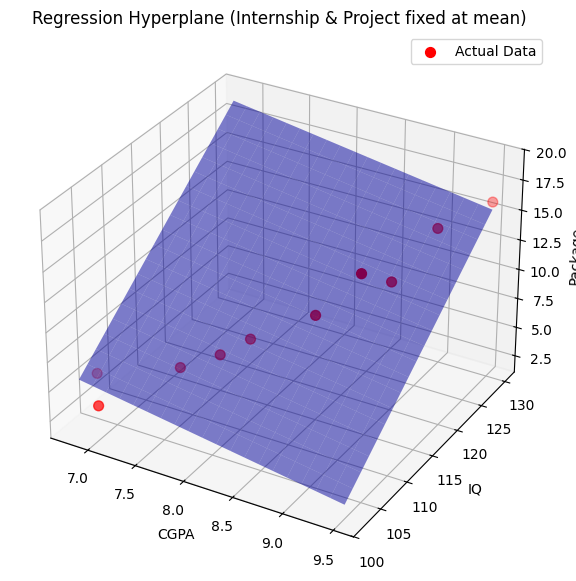

In [11]:

# ------------------------------------------
# 8. 3D Hyperplane Visualization
# Fix 4th feature (ProjectScore) at its mean
# ------------------------------------------
cgpa_range = np.linspace(df["CGPA"].min(), df["CGPA"].max(), 20)
iq_range = np.linspace(df["IQ"].min(), df["IQ"].max(), 20)
cgpa_grid, iq_grid = np.meshgrid(cgpa_range, iq_range)
project_fixed = np.mean(df["ProjectScore"])
internship_fixed = np.mean(df["InternshipScore"])

# Flatten grids and predict
grid_points = np.c_[cgpa_grid.ravel(),
                    iq_grid.ravel(),
                    np.full(cgpa_grid.size, internship_fixed),
                    np.full(cgpa_grid.size, project_fixed)]
package_grid = loaded_model.predict(grid_points).reshape(cgpa_grid.shape)

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["CGPA"], df["IQ"], df["Package"], color='red', s=50, label='Actual Data')
ax.plot_surface(cgpa_grid, iq_grid, package_grid, color='blue', alpha=0.5)

ax.set_xlabel('CGPA')
ax.set_ylabel('IQ')
ax.set_zlabel('Package')
ax.set_title('Regression Hyperplane (Internship & Project fixed at mean)')
plt.legend()
plt.show()